In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1875,2020-10-06,United Kingdom,514173.0,515571.0,42417.0,42369.0,-1398.0,48.0
1876,2020-10-06,Germany,302632.0,303258.0,9541.0,9546.0,-626.0,-5.0
1877,2020-10-06,Iran,474991.0,475674.0,27172.0,27192.0,-683.0,-20.0
1878,2020-10-06,Turkey,325641.0,326046.0,8490.0,8498.0,-405.0,-8.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  12094.758510638298
RMSE =  42946.738699490794


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  324.74840425531914
RMSE =  824.5557246694163


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  89772.86440677966
RMSE =  136138.06728637265
-- World performances for deaths --
MAE =  1976.0169491525423
RMSE =  2411.3339358708668


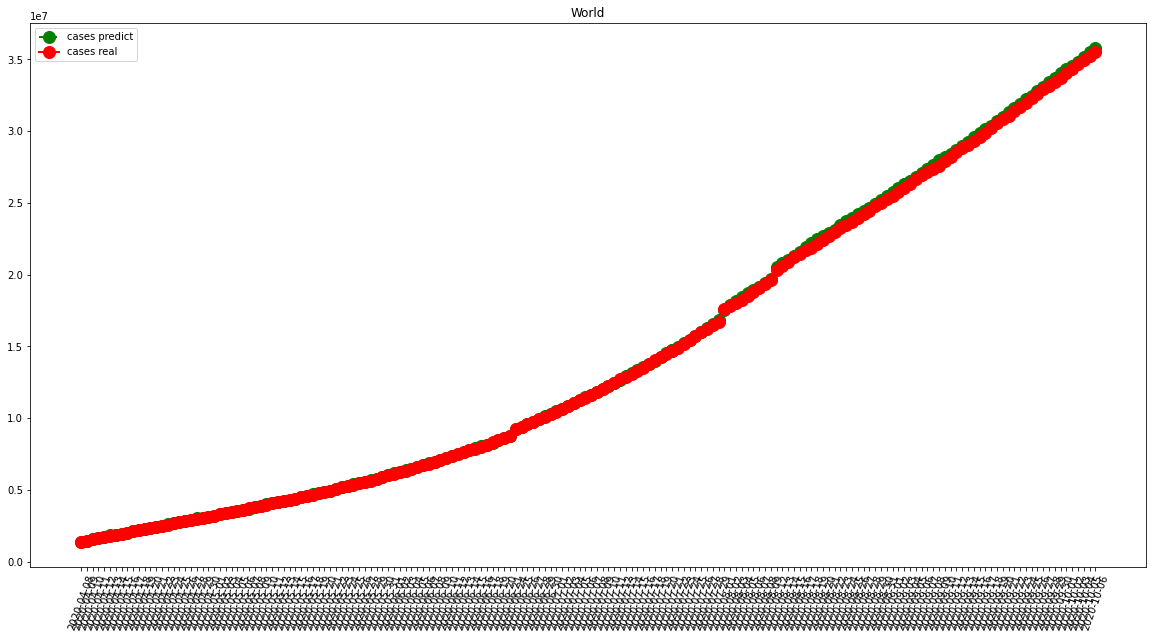

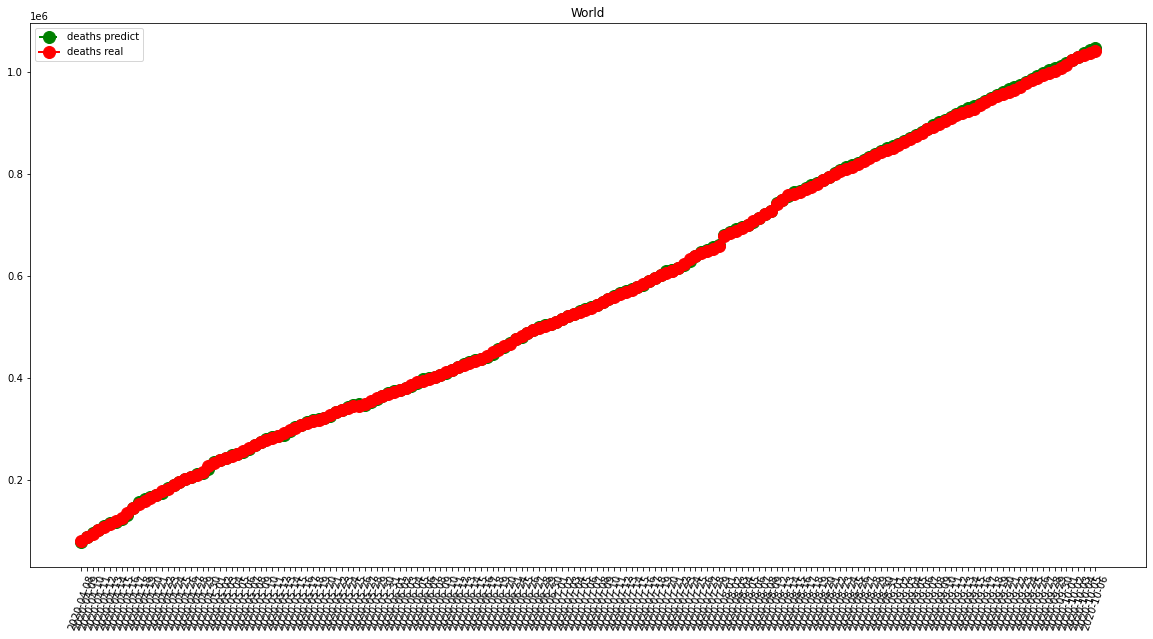

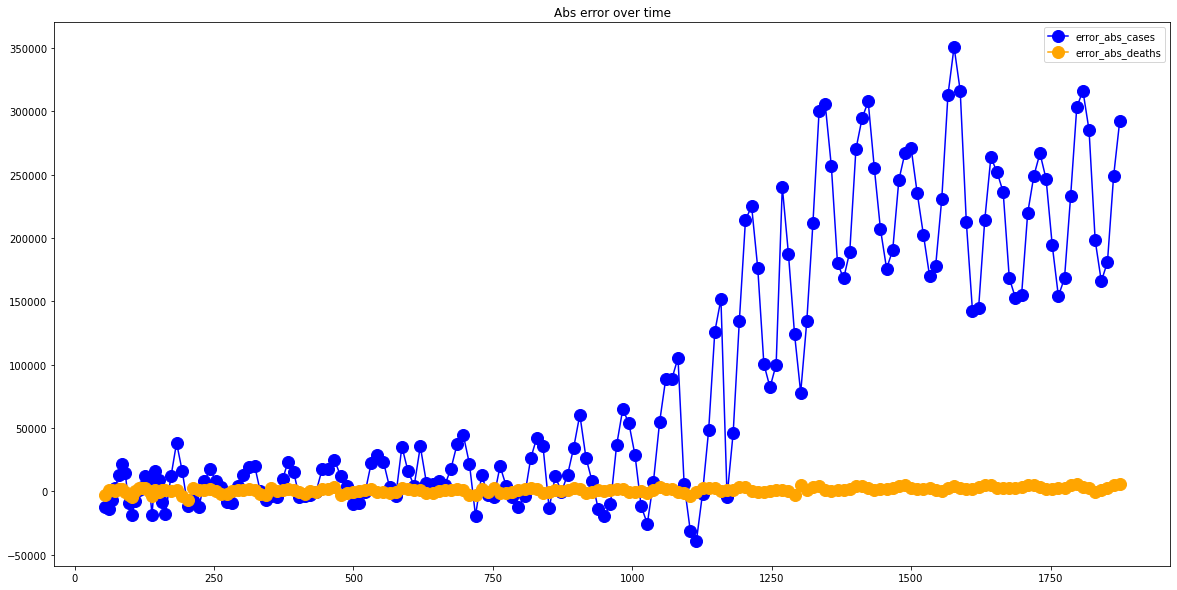

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1439.1550802139038
RMSE =  2304.747945201186
-- France performances for deaths --
MAE =  106.40106951871658
RMSE =  246.1749845021878


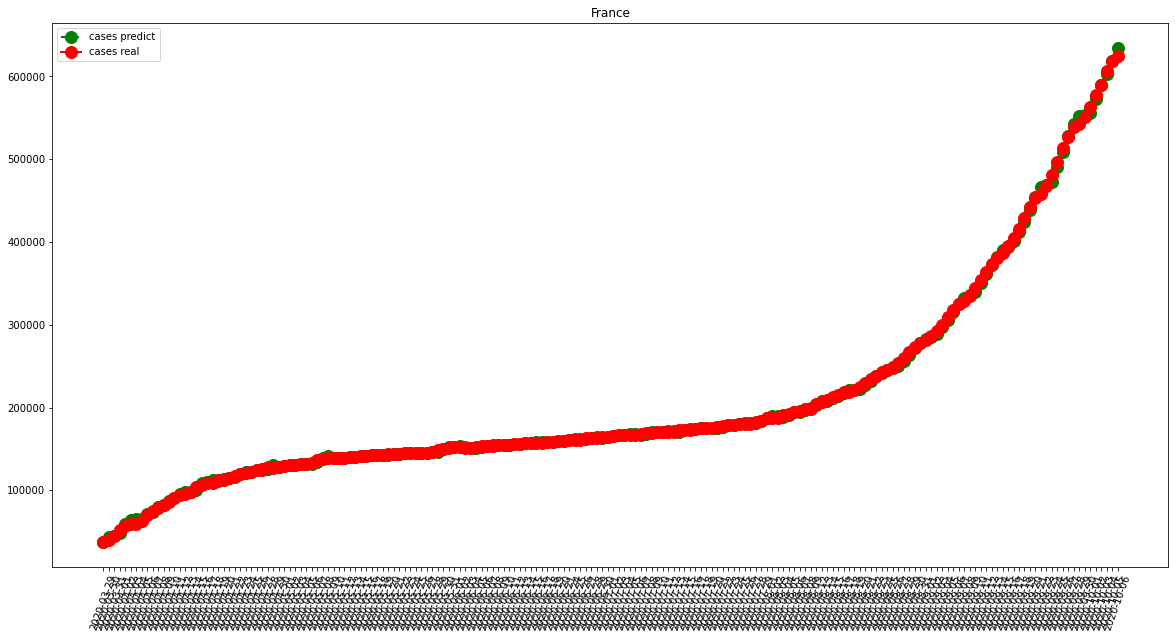

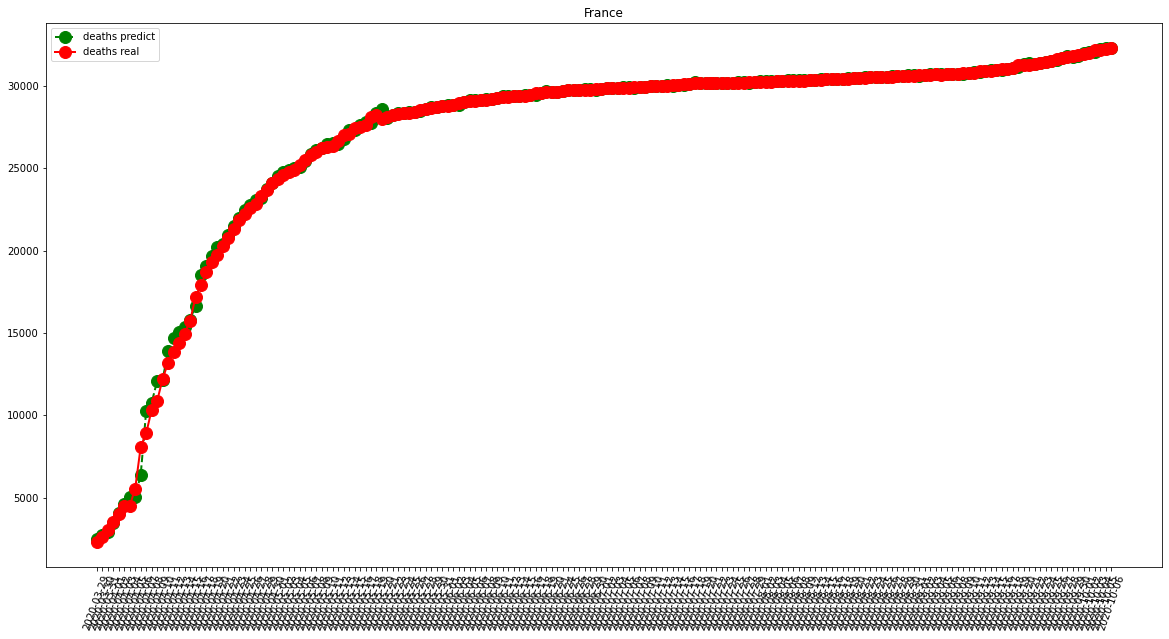

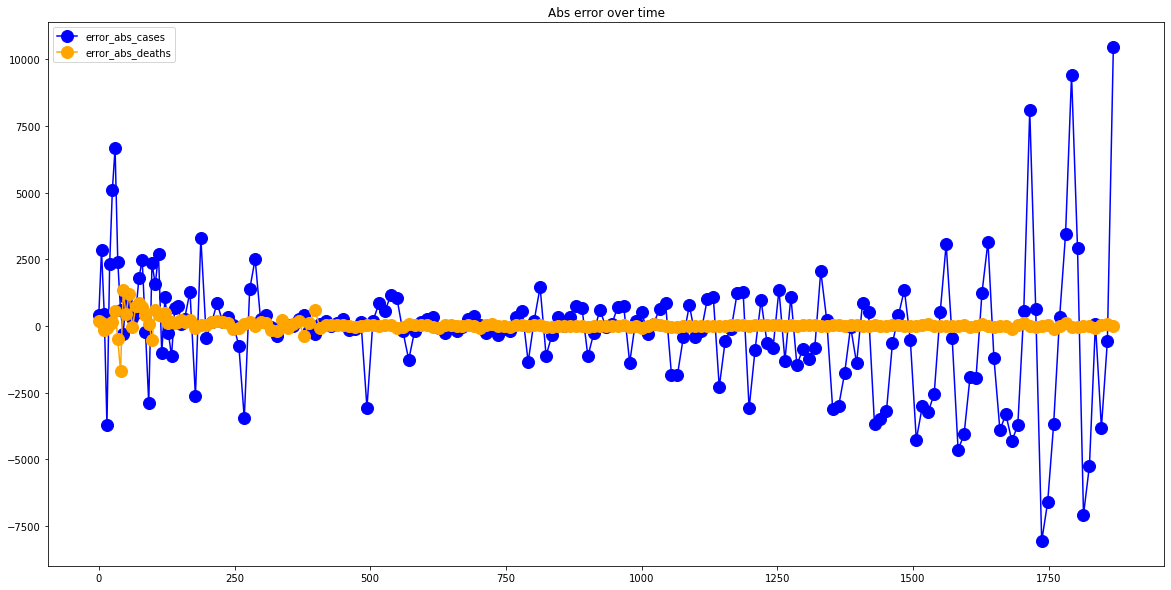

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  313.72192513368987
RMSE =  453.8648648089224
-- Italy performances for deaths --
MAE =  62.524064171122994
RMSE =  217.19411461285017


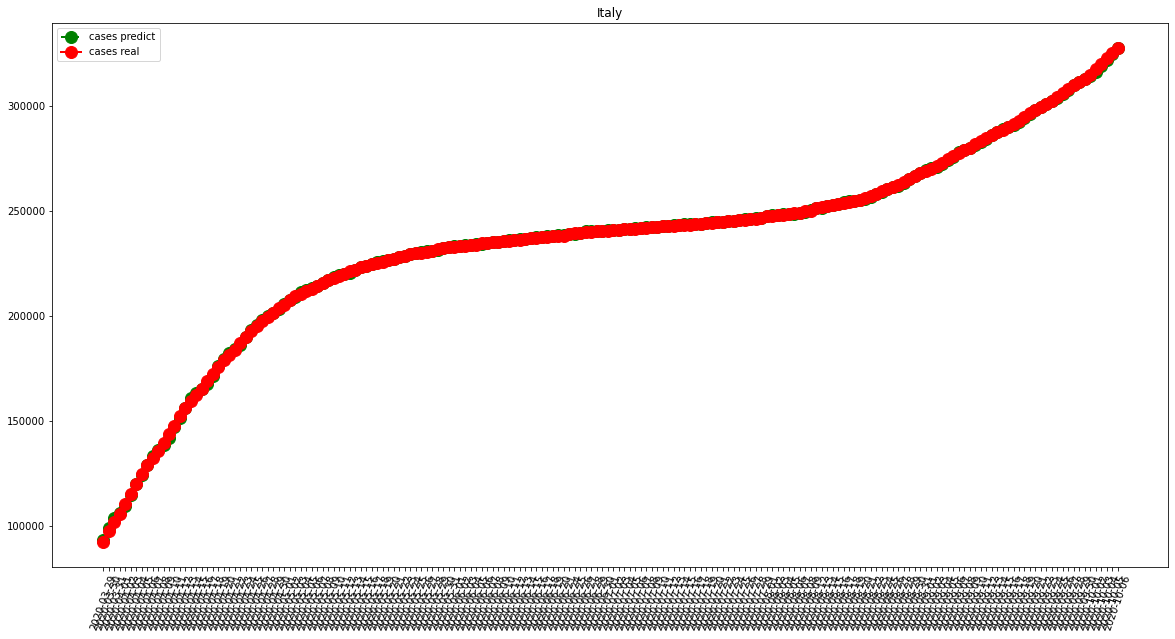

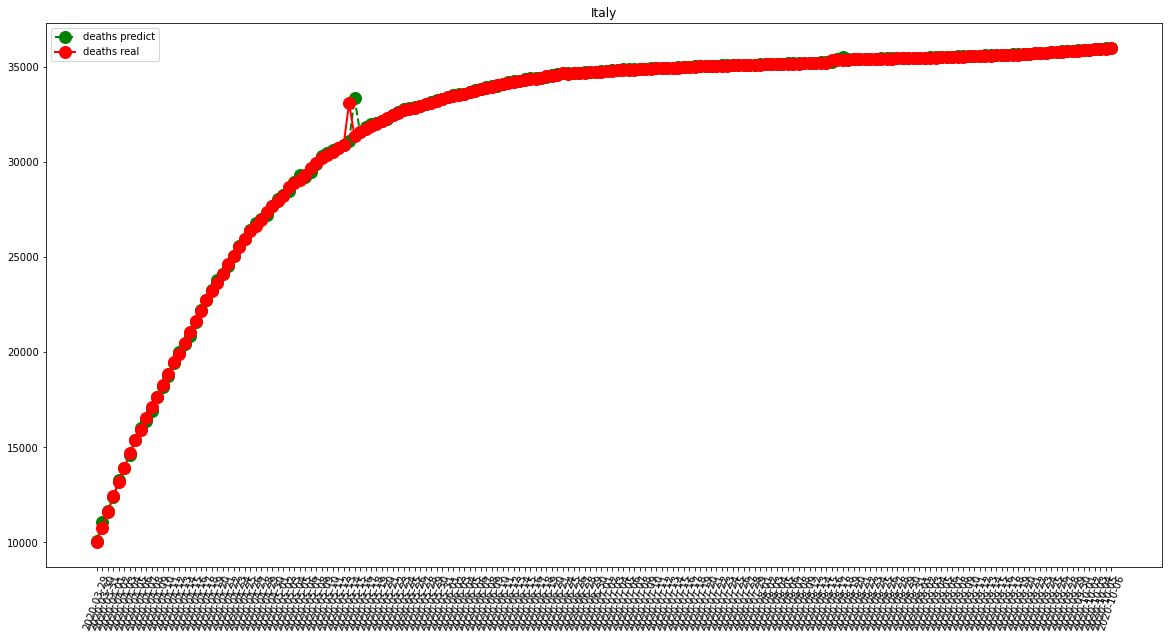

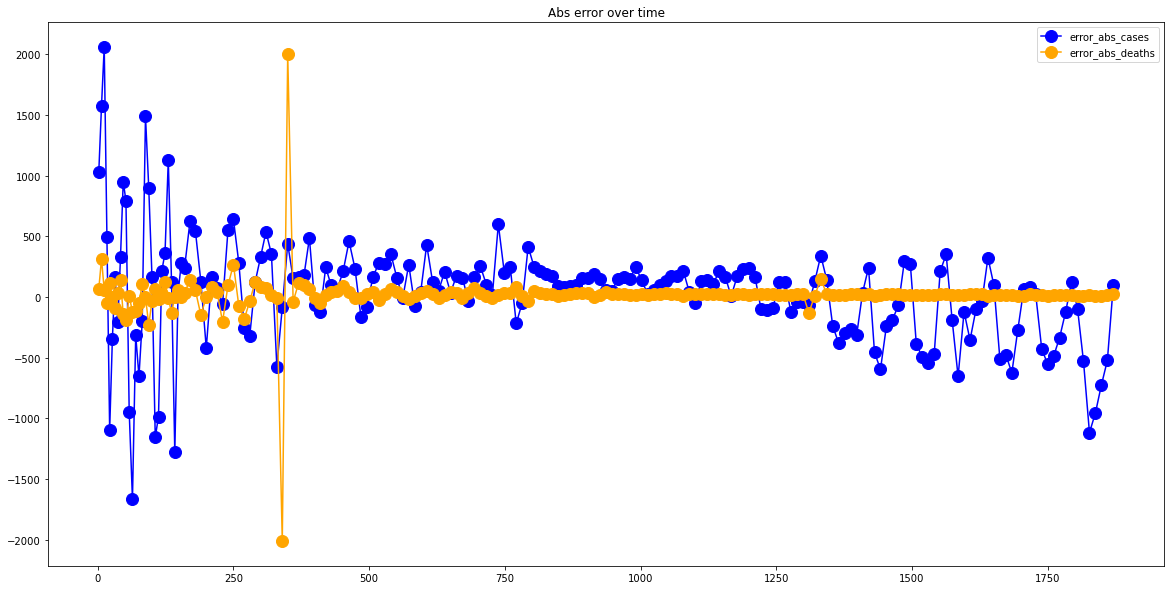

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  3021.385026737968
RMSE =  5799.699196975743
-- Spain performances for deaths --
MAE =  118.44385026737967
RMSE =  300.43012836945223


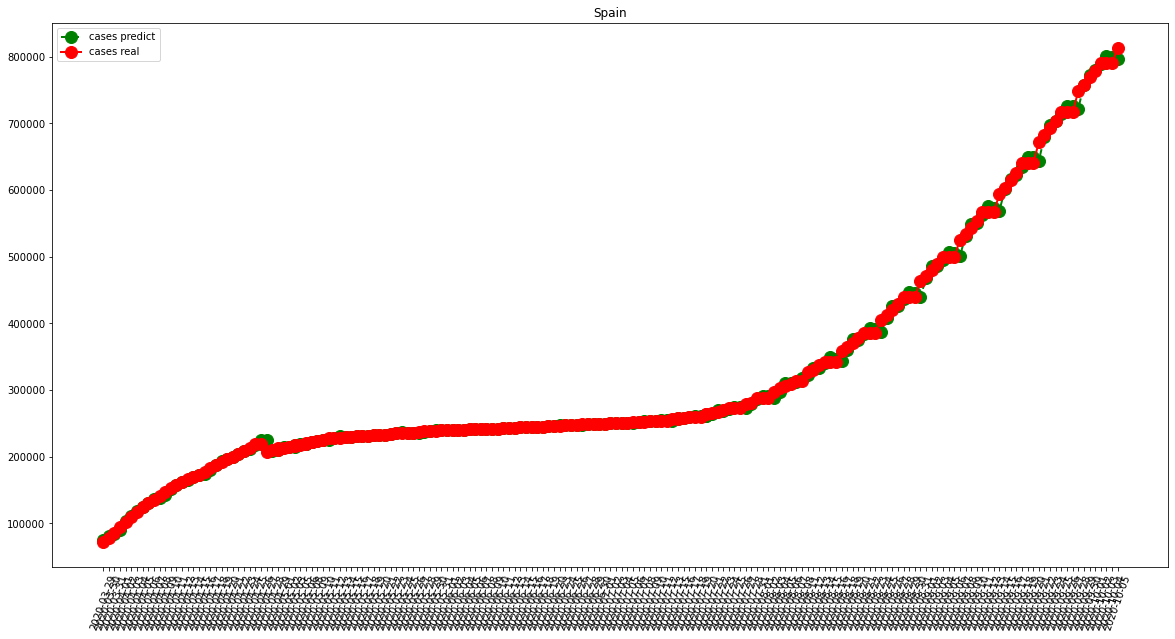

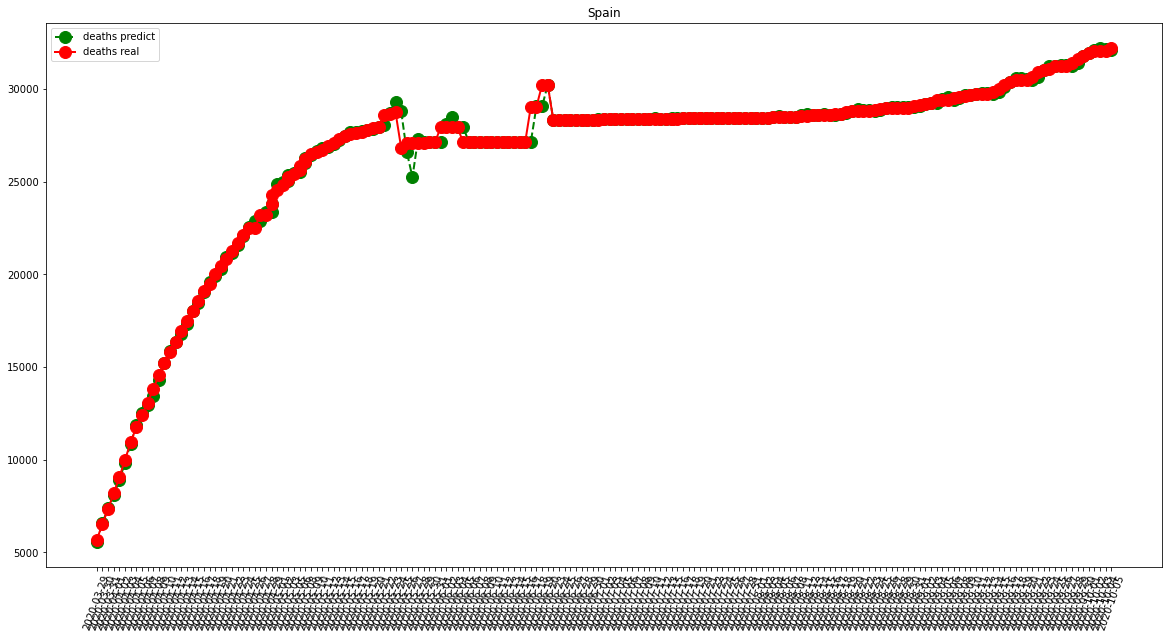

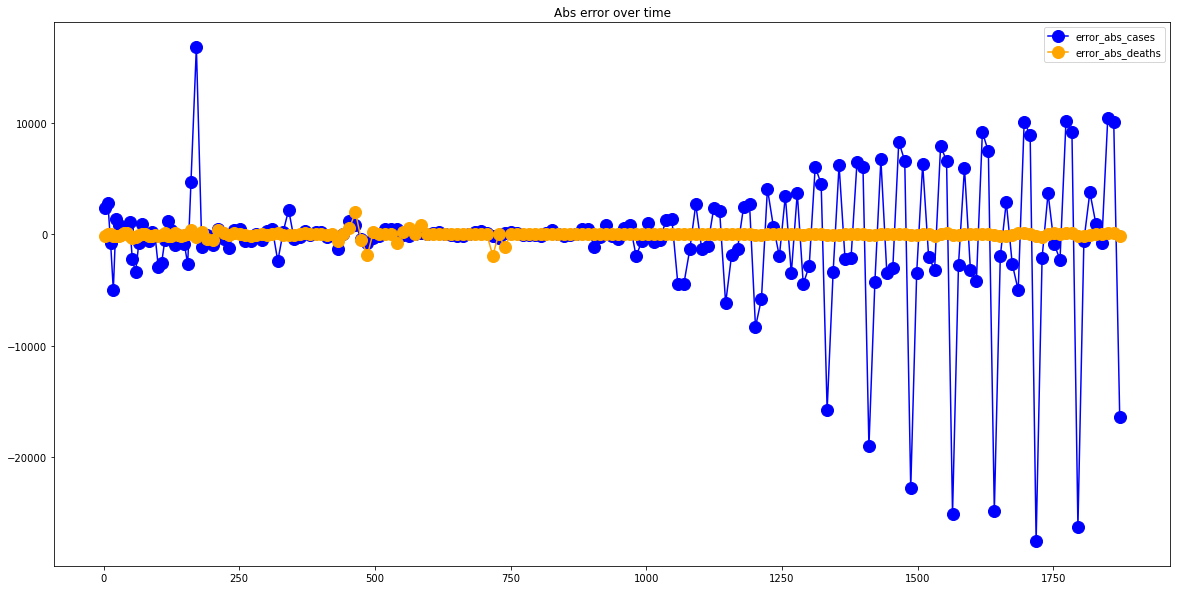

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16782.786096256685
RMSE =  23919.98738273861
-- United States performances for deaths --
MAE =  478.0
RMSE =  664.090443875726


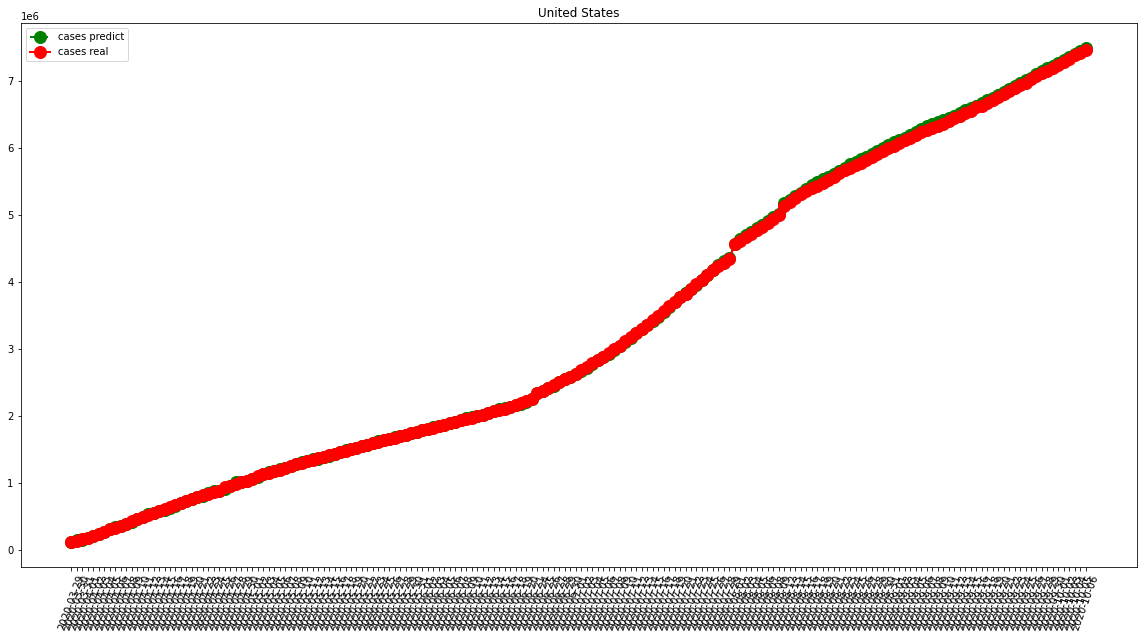

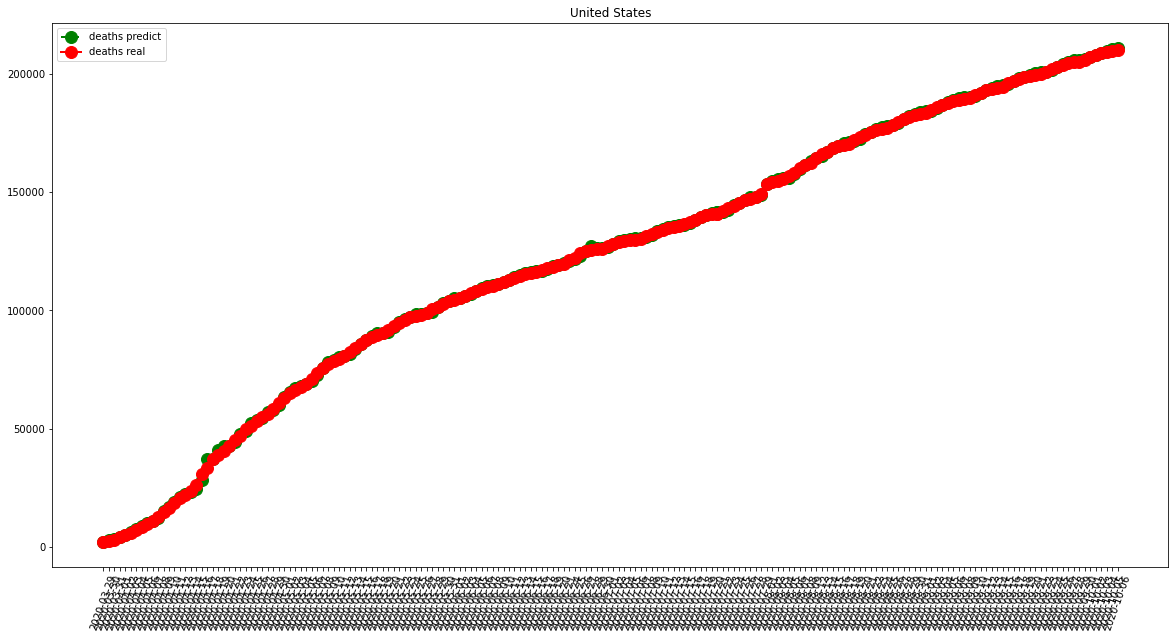

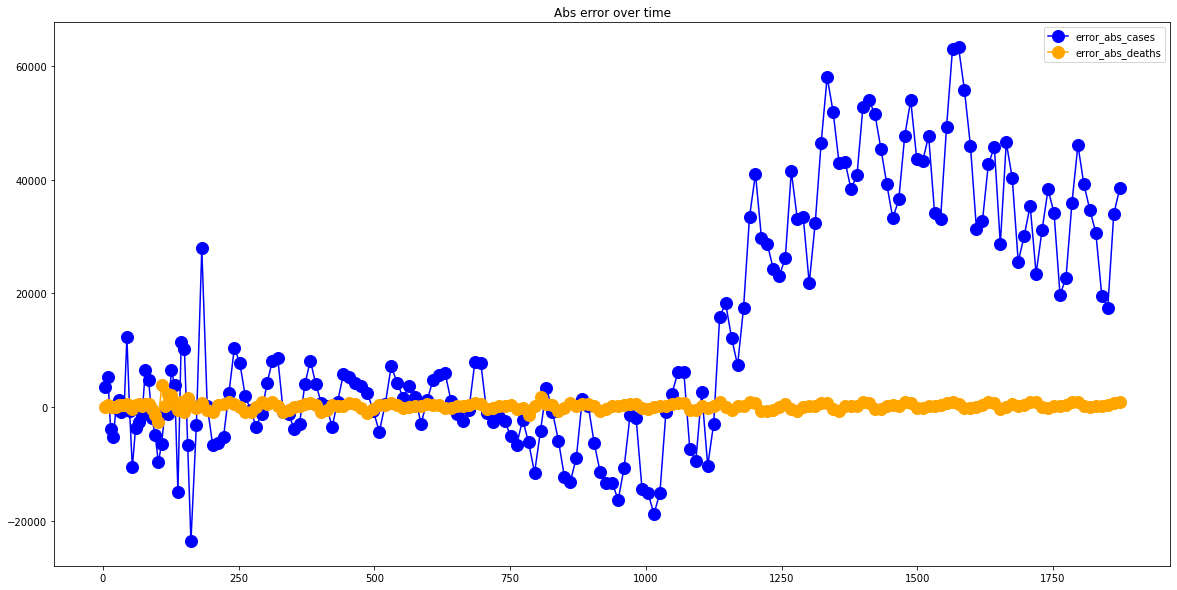

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  61.1283422459893
RMSE =  105.67195227365777
-- China performances for deaths --
MAE =  23.203208556149733
RMSE =  114.84714323900454


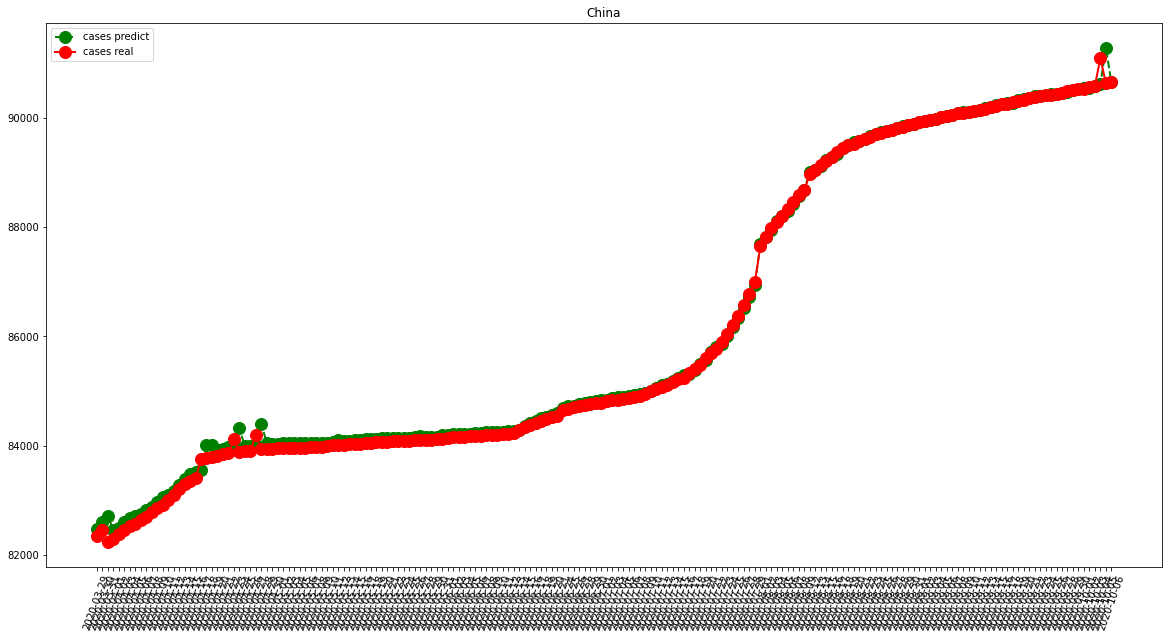

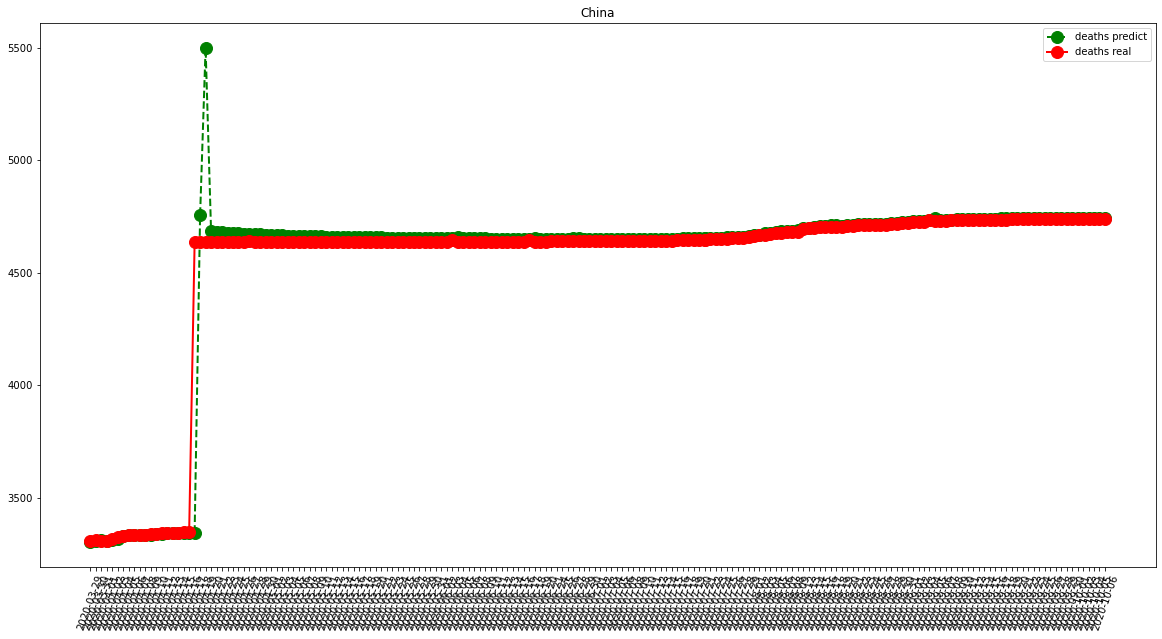

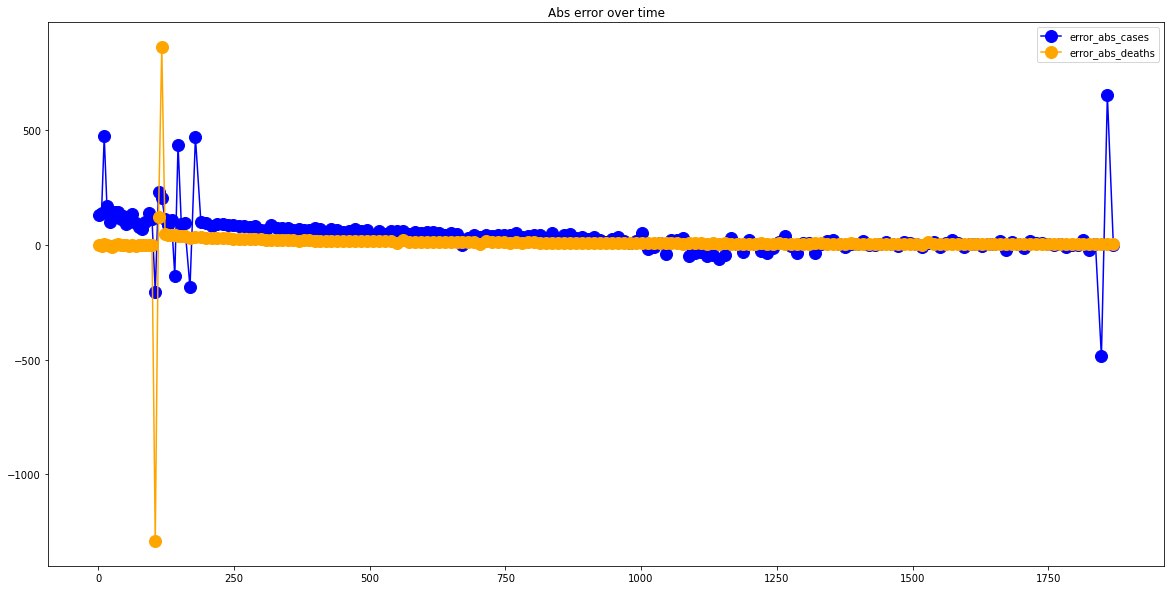

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1242.8238993710693
RMSE =  3725.263479770349
-- United Kingdom performances for deaths --
MAE =  196.54088050314465
RMSE =  676.9566283962066


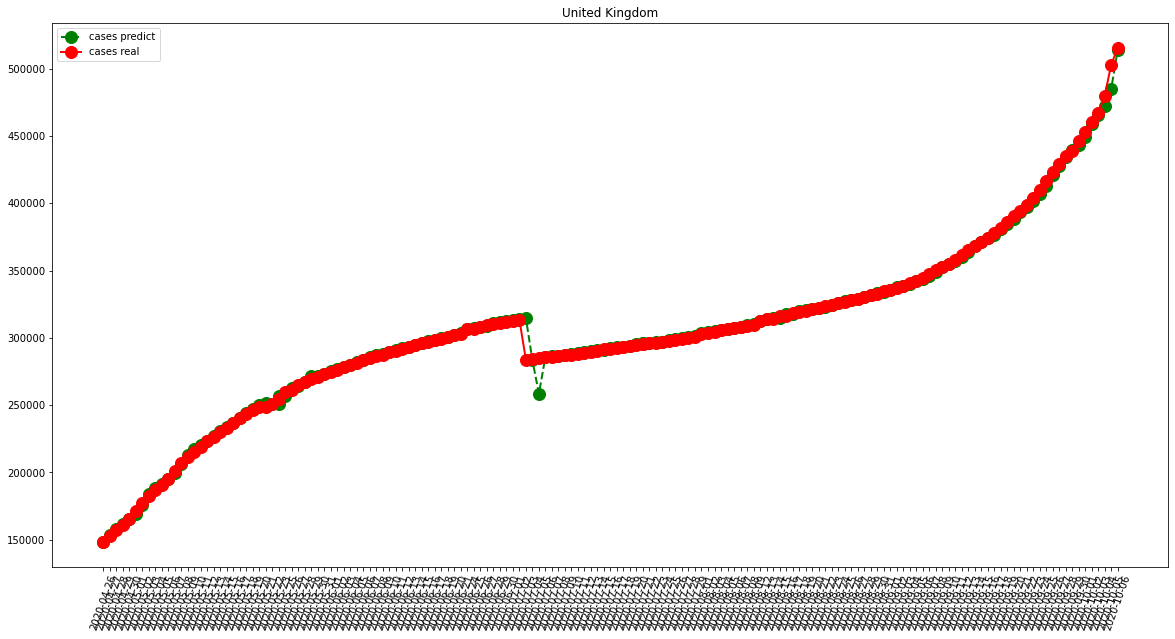

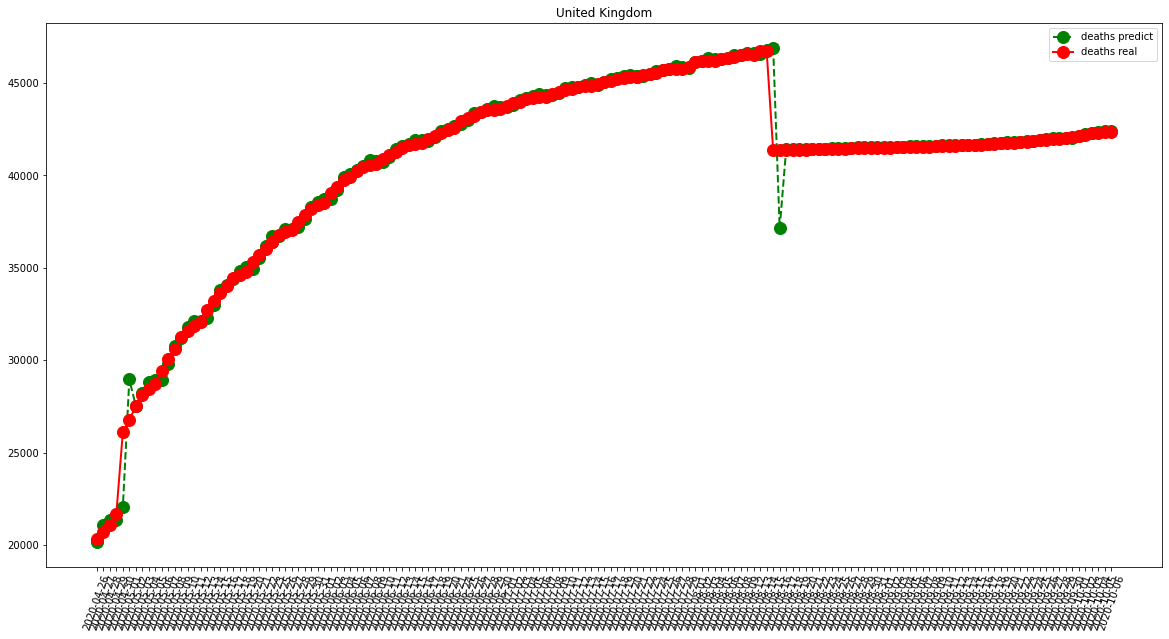

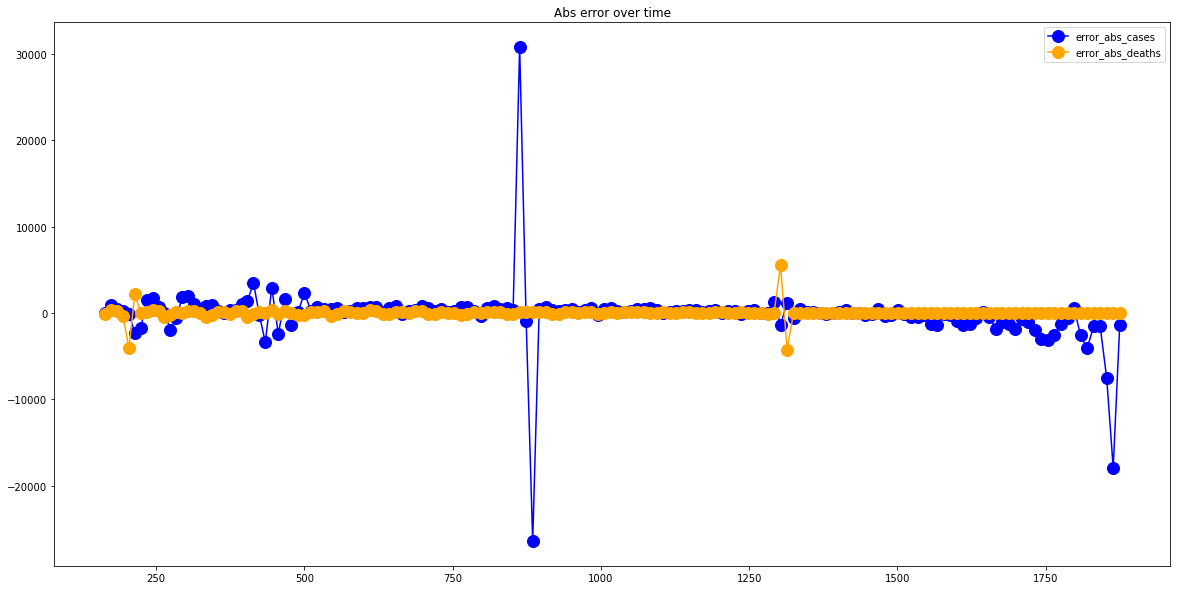

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  439.65408805031444
RMSE =  598.4315295816926
-- Germany performances for deaths --
MAE =  17.849056603773583
RMSE =  35.04624079285383


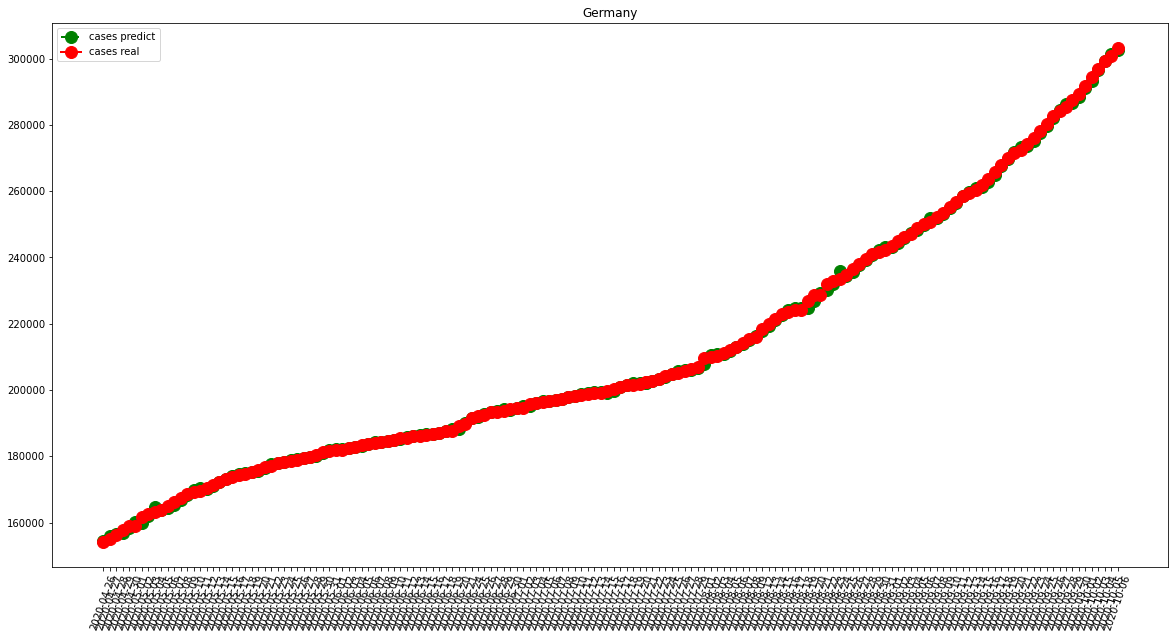

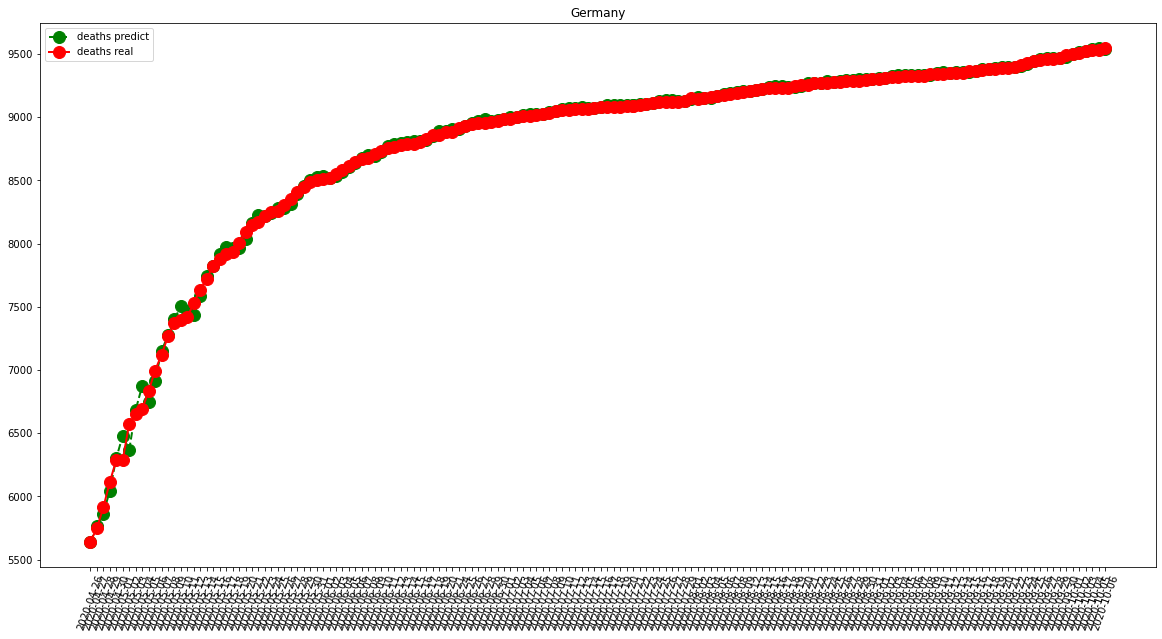

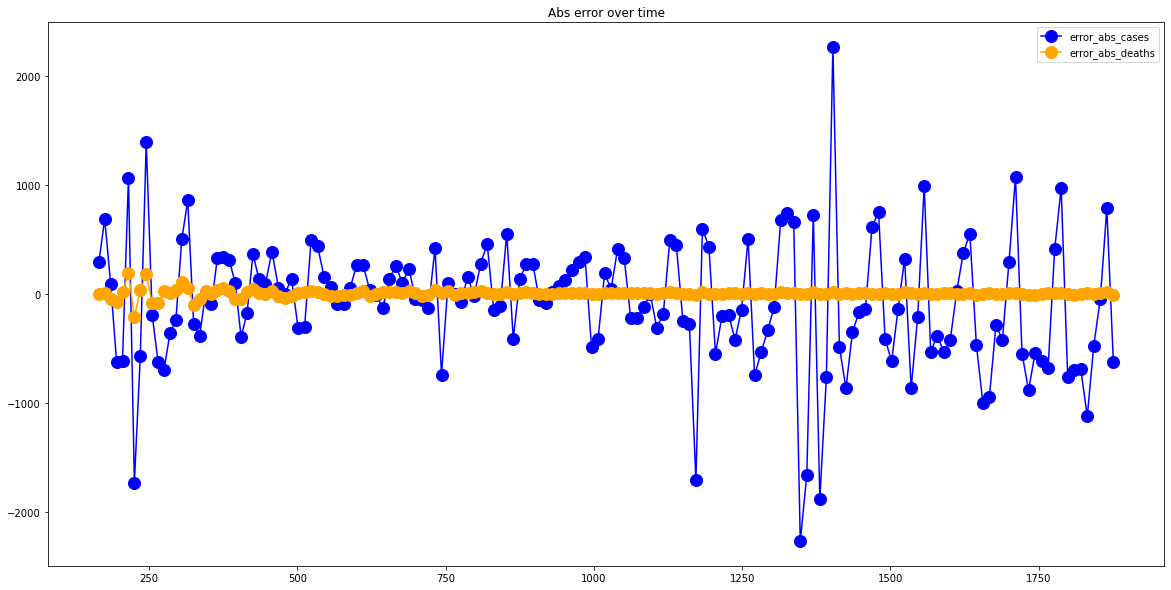

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  844.7987421383648
RMSE =  1185.4239986619866
-- Iran performances for deaths --
MAE =  49.088050314465406
RMSE =  81.60022968274494


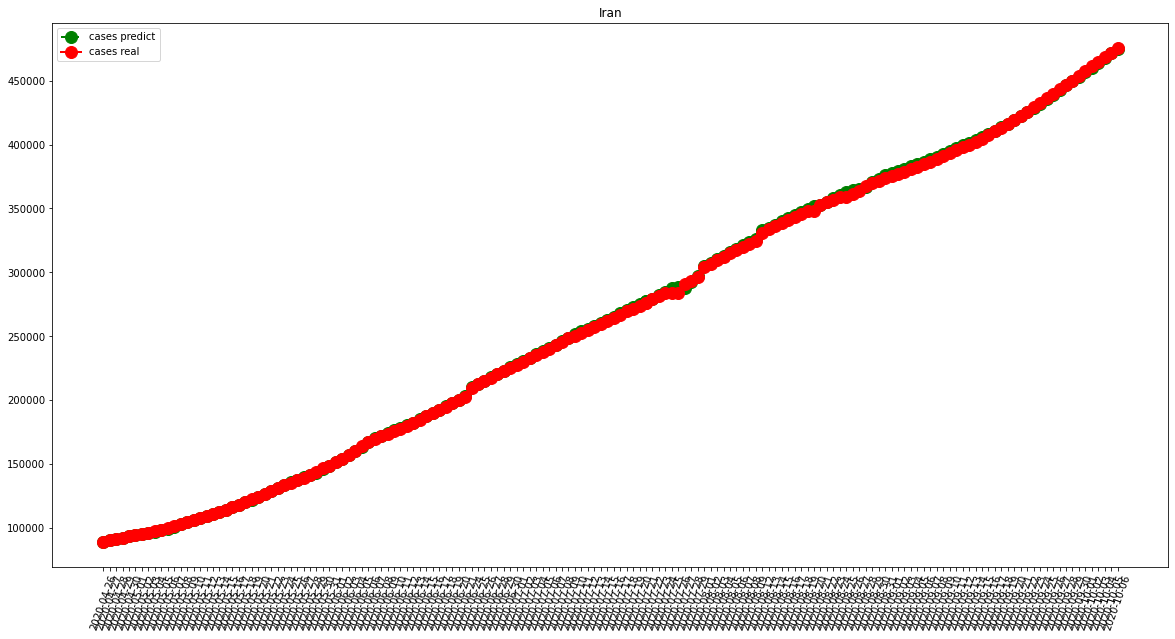

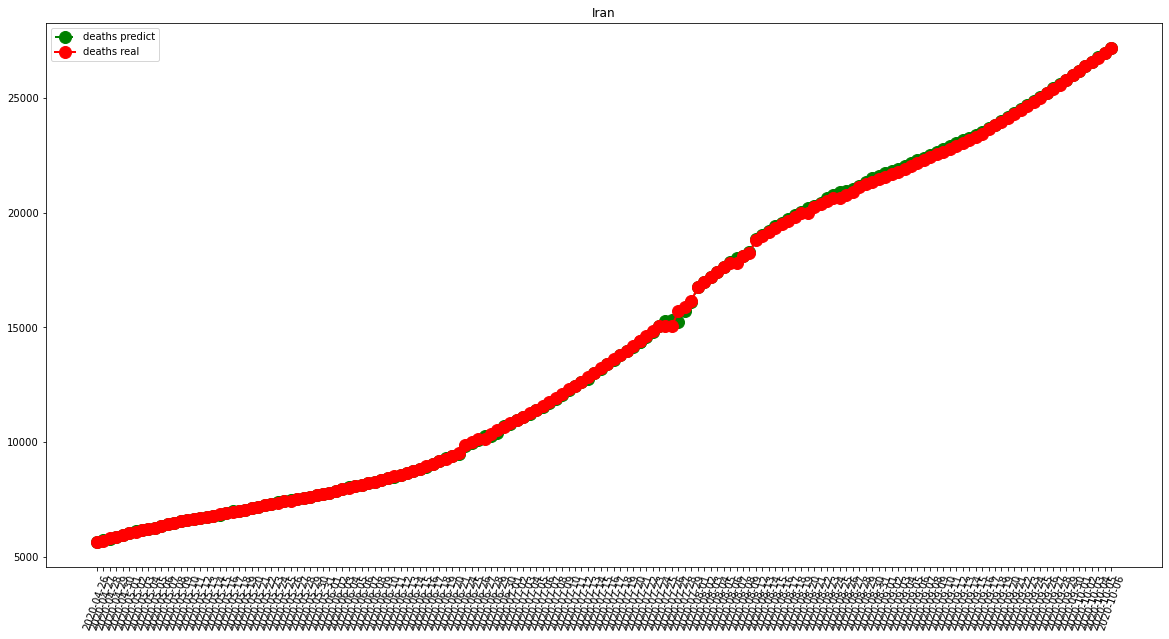

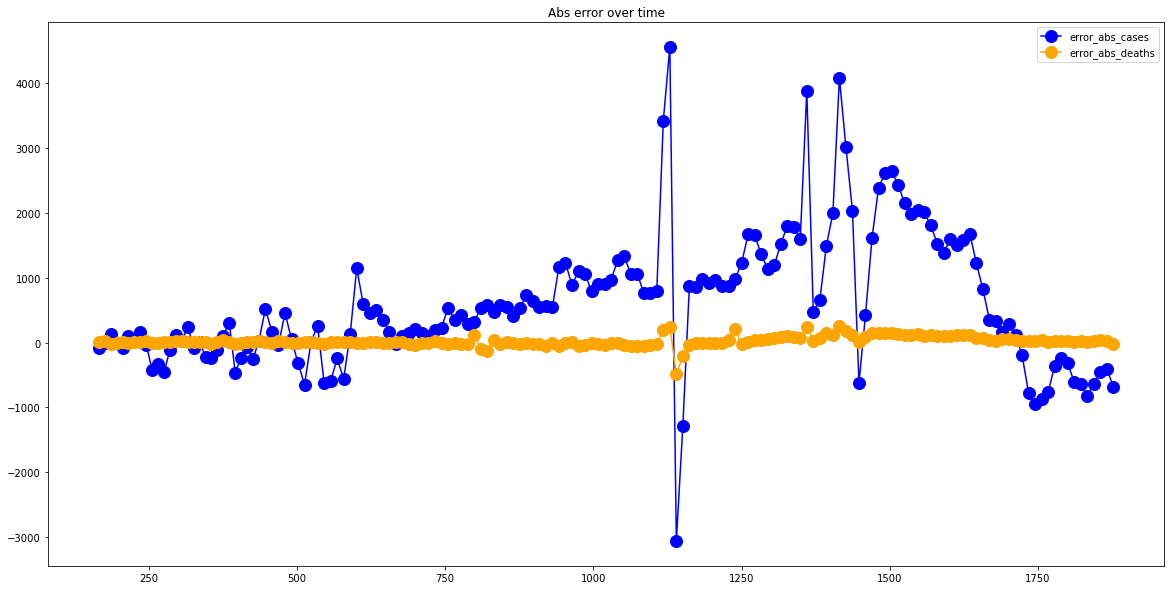

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  229.0251572327044
RMSE =  329.7498098663868
-- Turkey performances for deaths --
MAE =  15.446540880503145
RMSE =  80.79417128238613


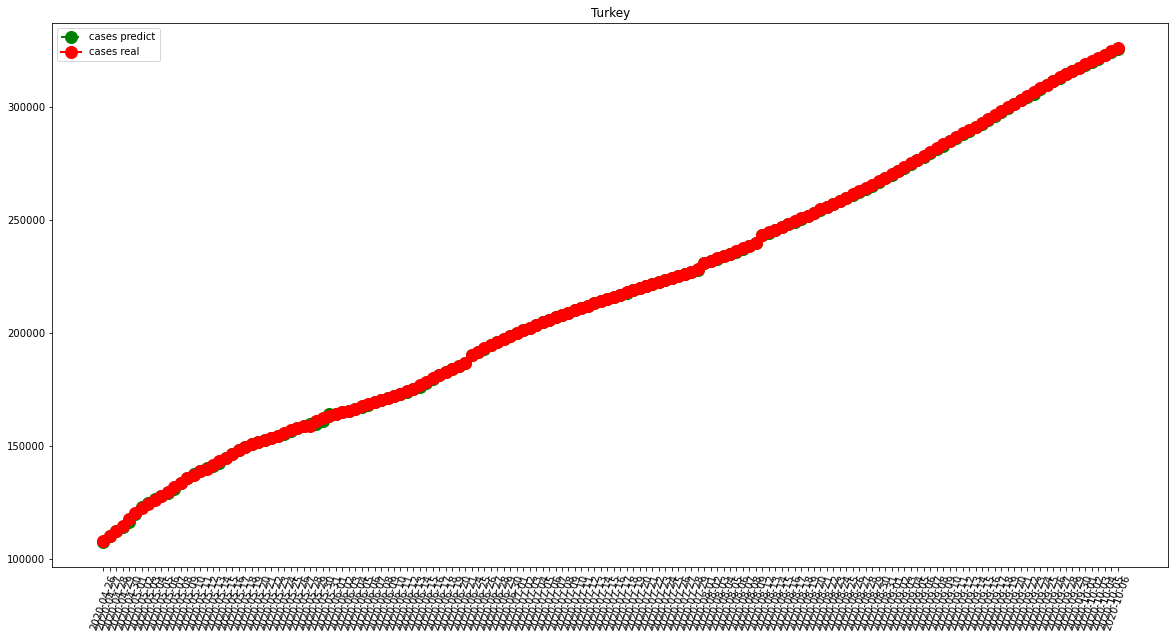

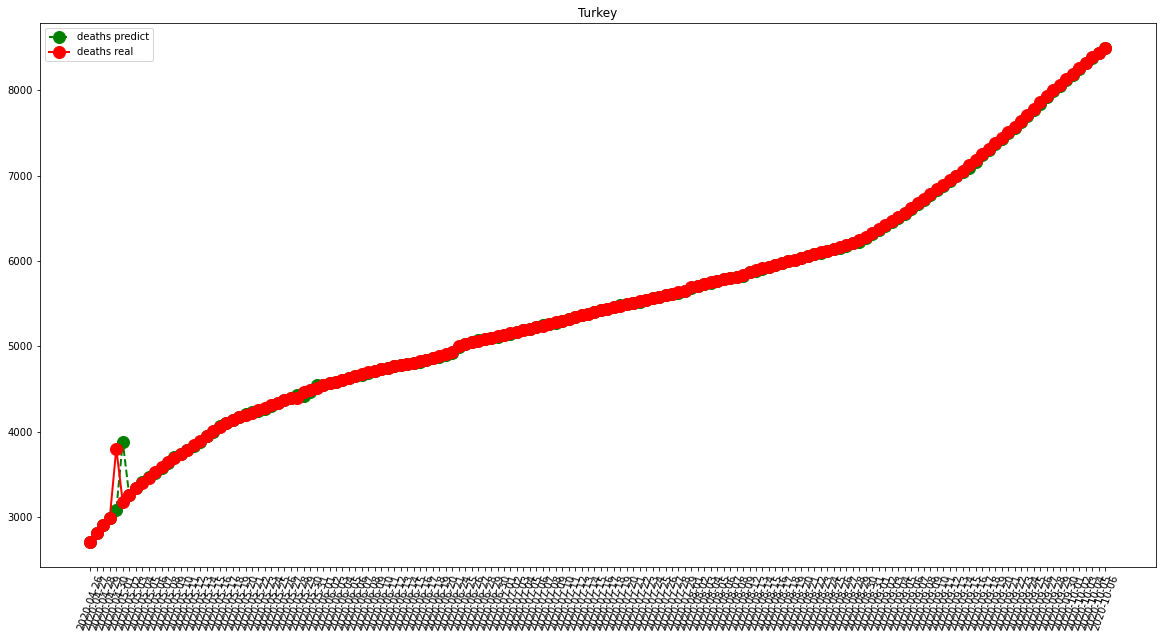

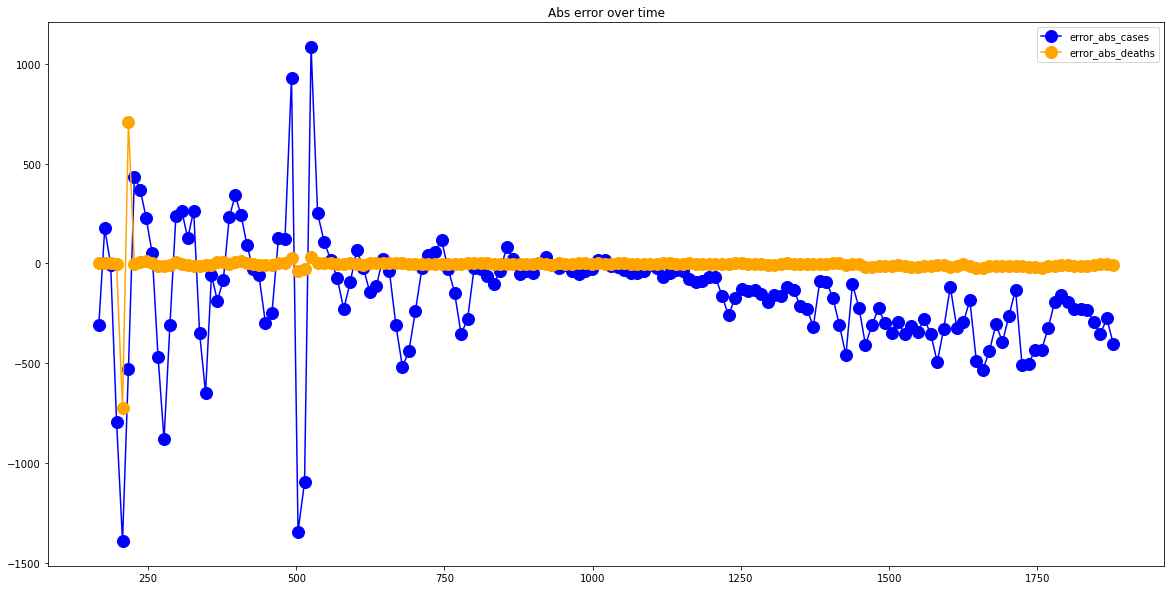

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17935.590909090908
RMSE =  23069.132557150777
-- Brazil performances for deaths --
MAE =  522.4242424242424
RMSE =  627.0389770882499


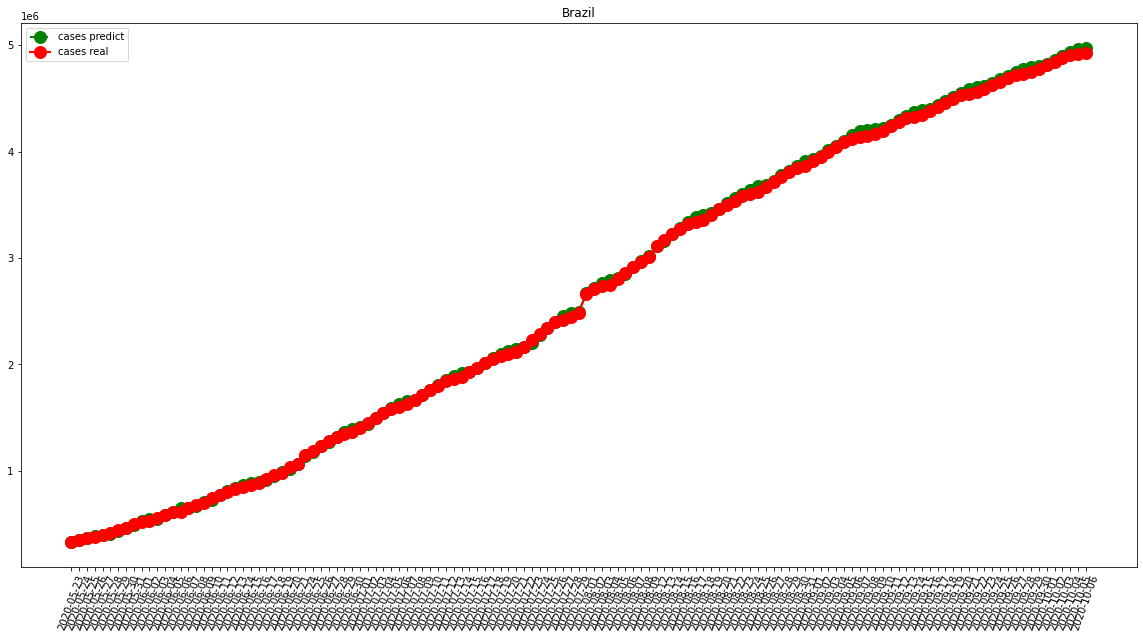

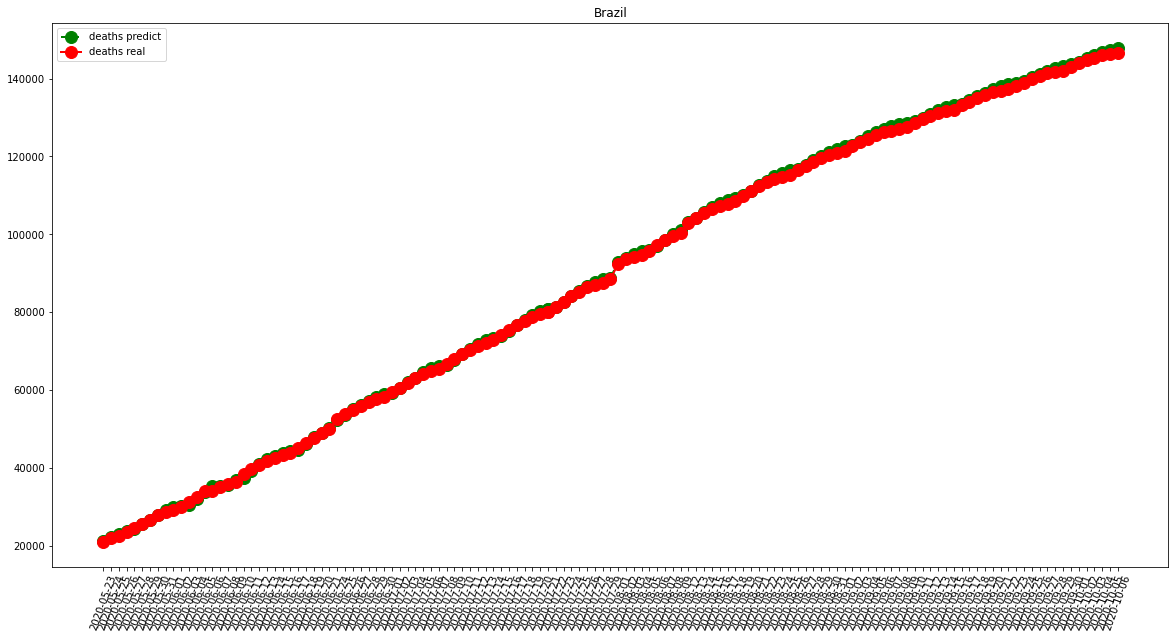

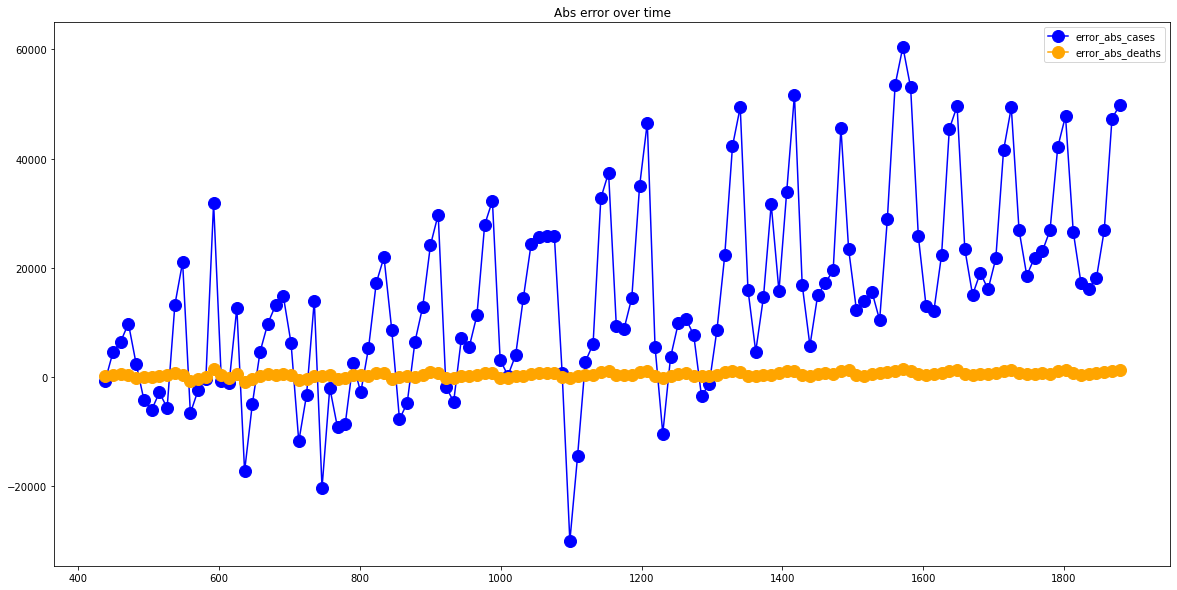

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)